# Arch Calculator:
## A Python program for calculating coordinates of arches

## More documentation to come shortly!

By Kenneth Burchfiel

Everything in this project is released under the MIT license

In [1]:
import math
dtr = math.pi/180 # Converts degrees to radians;
# useful because math.tan, math.sin, and math.cos take radian inputs.
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon # From https://matplotlib.org/stable/gallery/shapes_and_collections/patch_collection.html#sphx-glr-gallery-shapes-and-collections-patch-collection-py
from matplotlib.collections import PatchCollection
from IPython.display import Image # from: Magno Naoli at:
# https://stackoverflow.com/a/62985628/13097194

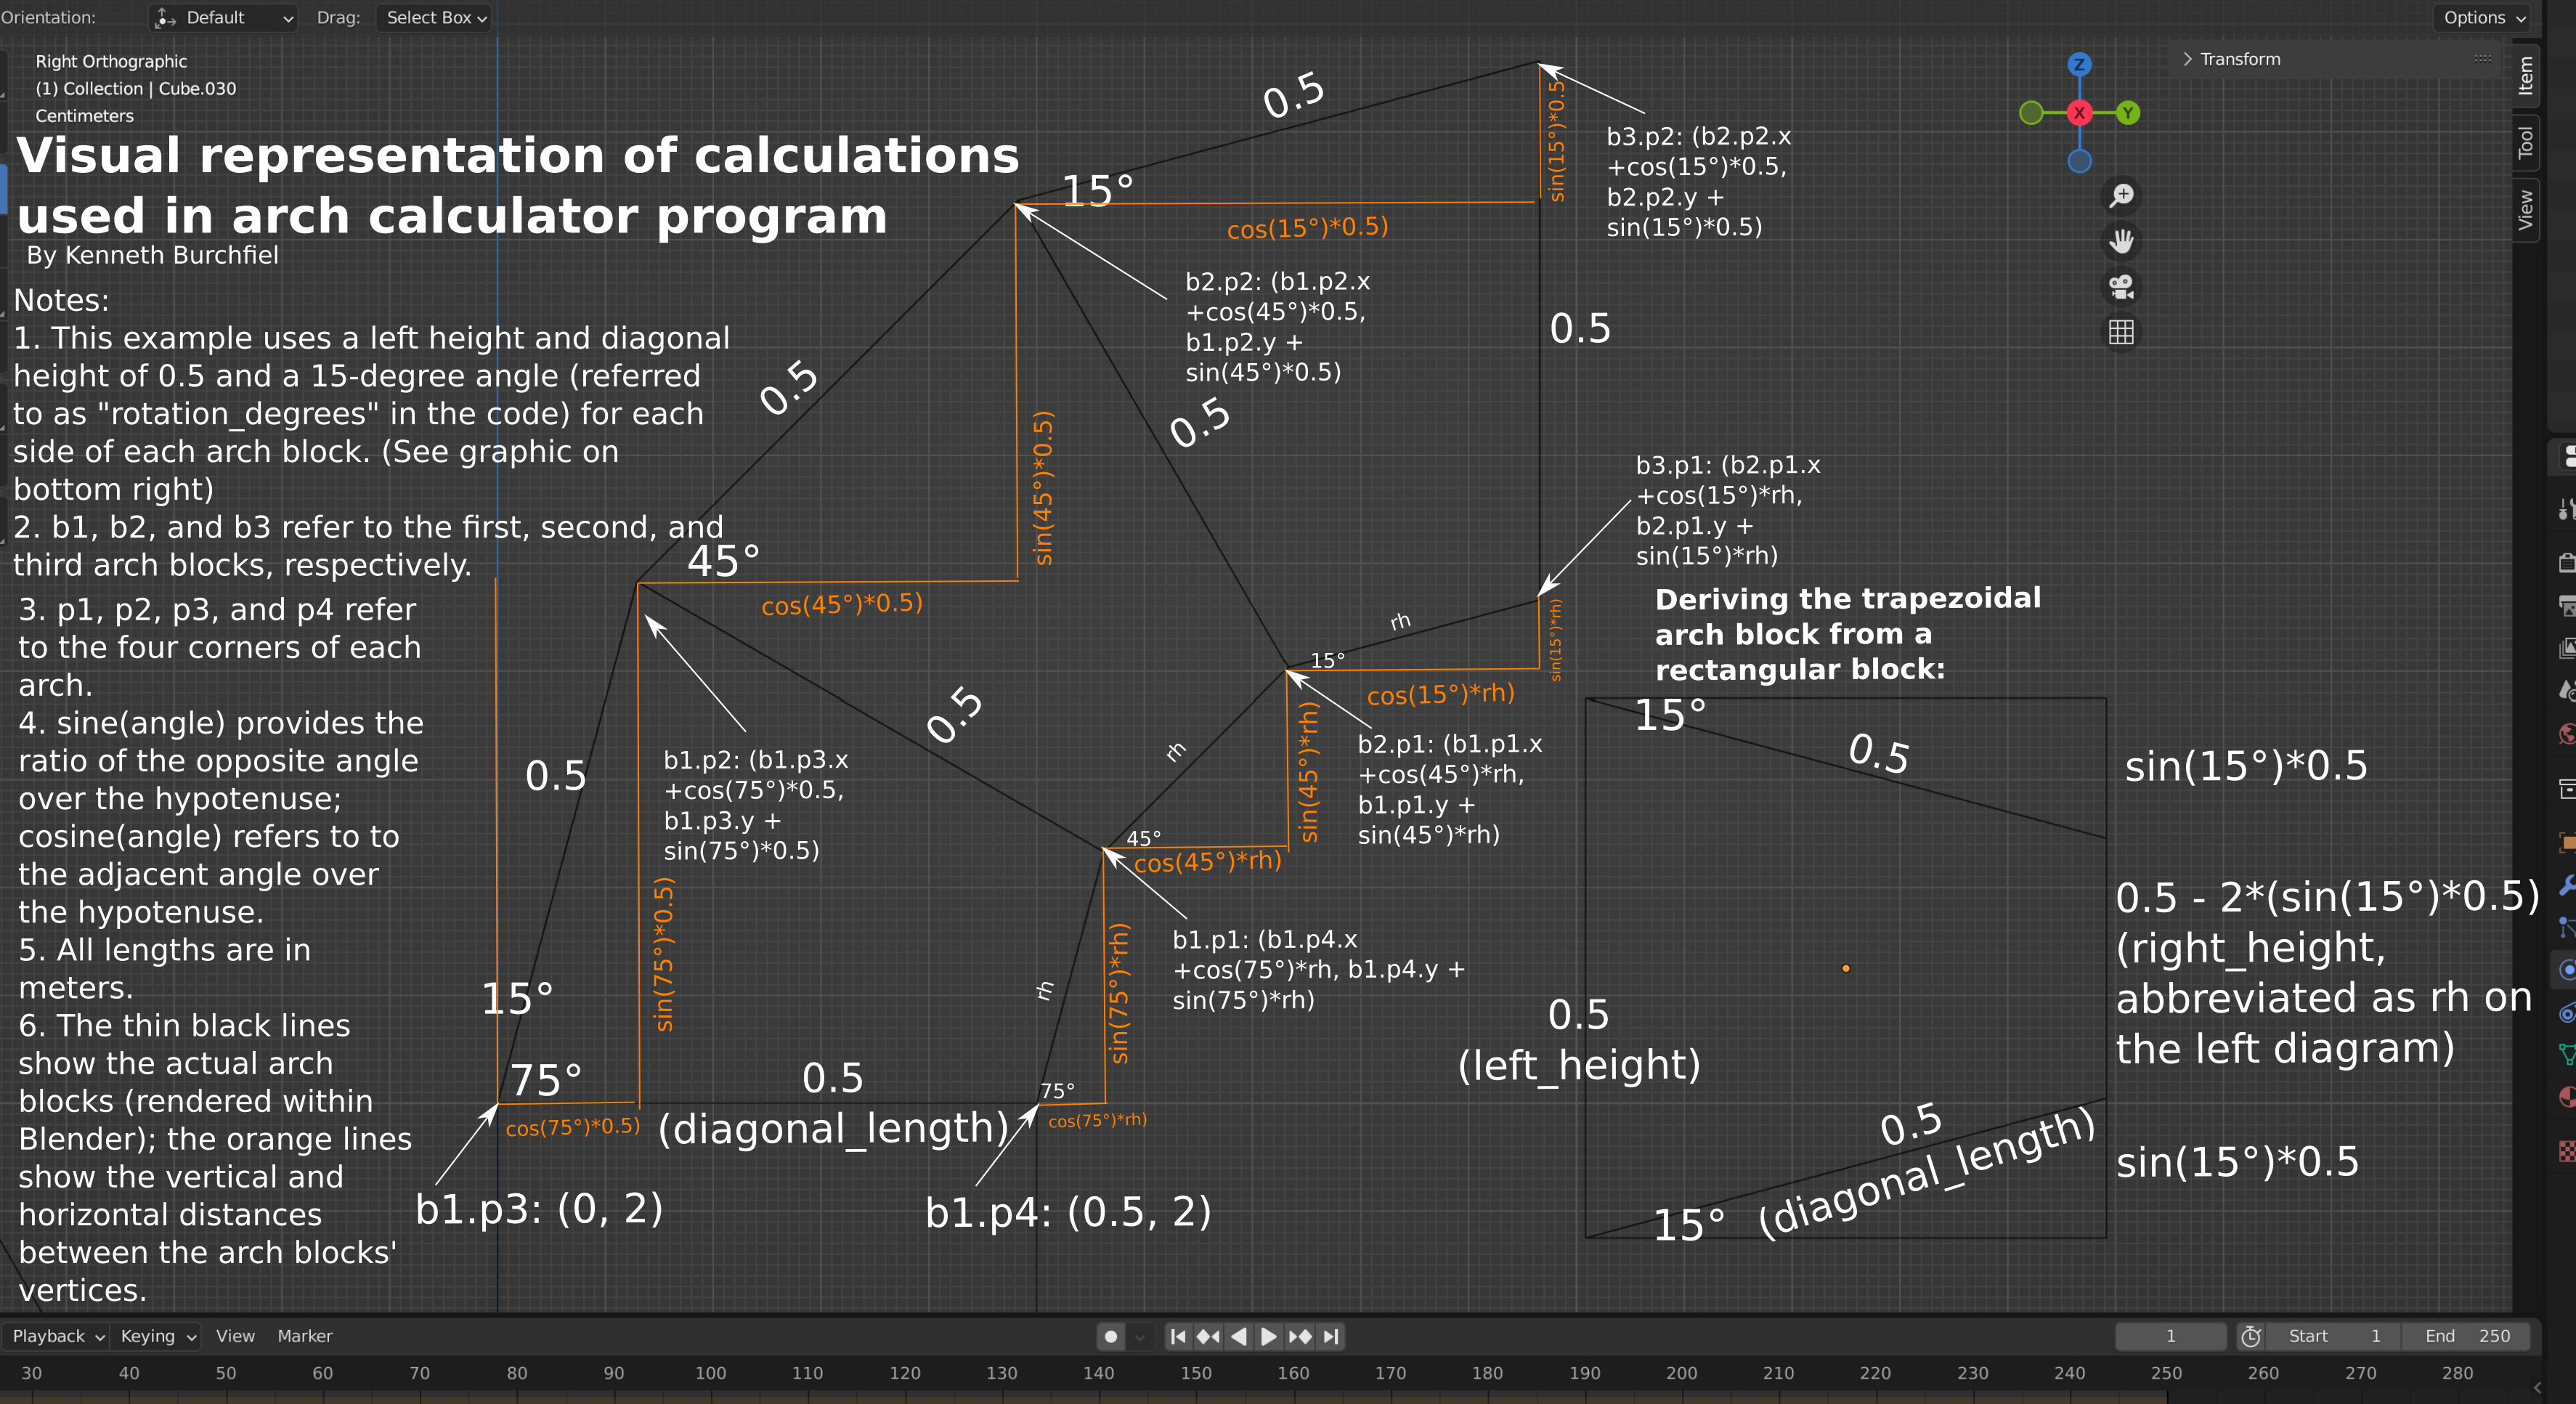

In [2]:
# The image display code below comes from Magno Naoli at:
# https://stackoverflow.com/a/62985628/13097194
Image(filename = 'annotated_arch_output.png')

In [3]:
class Arch_block:
    def __init__(self, left_height = 0.5, diagonal_length = 0.5, p4 = (0.5, 2), p3 = (0, 2), rotation_degrees = 15, rotation_multiplier = 1):
        self.left_height = left_height
        self.rotation_degrees = rotation_degrees
        self.diagonal_length = diagonal_length
        self.right_height = left_height - 2*(math.sin(rotation_degrees * dtr))*diagonal_length
        self.p4 = p4
        self.p3 = p3
        # self.p3 = (p4[0] - diagonal_length, p4[1])
        self.p1 = (self.p4[0] + math.cos((90-rotation_degrees * rotation_multiplier)*dtr) * self.right_height, self.p4[1] + math.sin((90 - rotation_degrees * rotation_multiplier)*dtr) * self.right_height)
        self.p2 = (self.p3[0] + math.cos((90-rotation_degrees * rotation_multiplier)*dtr) * self.left_height, self.p3[1] + math.sin((90 - rotation_degrees * rotation_multiplier)*dtr) * self.left_height)
    def __str__(self):
        return '{} {} {} {} {} {} {} {}'.format("P1:", self.p1, "P2:", self.p2, "P3:", self.p3, "P4:", self.p4)
        # The .format() function converts the tuple values into a string.
        # See https://stackoverflow.com/a/39884000/13097194 
        


In [4]:
def create_arch(rotation_degrees, starting_p4, starting_p3, arch_count, left_height, diagonal_length):
    arch_block_list = []
    for i in range(arch_count):
        if i == 0:
            arch_block_list.append(Arch_block(left_height = left_height, diagonal_length=diagonal_length, p4 = starting_p4, p3=starting_p3, rotation_degrees = rotation_degrees, rotation_multiplier = 1))
        else:
            arch_block_list.append(Arch_block(left_height = left_height, diagonal_length=diagonal_length, p4 = arch_block_list[-1].p1, p3=arch_block_list[-1].p2, rotation_degrees = rotation_degrees, rotation_multiplier = 1 + i*2))

    return arch_block_list

In [5]:
three_block_arch = create_arch(rotation_degrees = 15, starting_p4 = (0.5, 2), starting_p3 = (0, 2), left_height = 0.5, diagonal_length = 0.5, arch_count = 3)

In [6]:
for i in range(len(three_block_arch)):
    print("Block number",str(i)+":")
    print(three_block_arch[i])

Block number 0:
P1: (0.5624222244434797, 2.2329629131445343) P2: (0.12940952255126037, 2.4829629131445343) P3: (0, 2) P4: (0.5, 2)
Block number 1:
P1: (0.7329629131445341, 2.4035036018455886) P2: (0.48296291314453416, 2.8365163037378083) P3: (0.12940952255126037, 2.4829629131445343) P4: (0.5624222244434797, 2.2329629131445343)
Block number 2:
P1: (0.9659258262890683, 2.465925826289068) P2: (0.9659258262890683, 2.9659258262890686) P3: (0.48296291314453416, 2.8365163037378083) P4: (0.7329629131445341, 2.4035036018455886)


(0.0, 5.0)

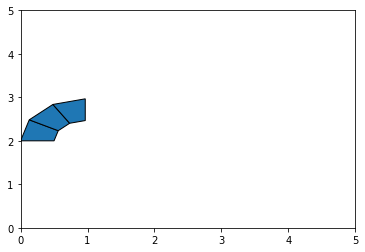

In [7]:
patches = []
# Based on: https://stackoverflow.com/questions/43971259/how-to-draw-polygons-with-python
# and; https://stackoverflow.com/a/68532480/13097194
fig, ax = plt.subplots()
for arch_block in three_block_arch:
    arch_block_polygon = Polygon([arch_block.p1, arch_block.p2, arch_block.p3, arch_block.p4], edgecolor = 'black', closed = 'True')
    ax.add_patch(arch_block_polygon)
plt.xlim(0, 5)
plt.ylim(0, 5)



    # plt.plot(arch_block.p1, arch_block.p2, arch_block.p3, arch_block.p4)

In [8]:
six_block_arch = create_arch(rotation_degrees = 7.5, starting_p4 = (0.5, 2), starting_p3 = (0, 2), left_height = 0.5, diagonal_length = 0.5, arch_count = 6)

In [9]:
for i in range(len(six_block_arch)):
    print("Block number",str(i)+":")
    print(six_block_arch[i])

Block number 0:
P1: (0.54822600925456, 2.3663129081356447) P2: (0.06526309611002586, 2.495722430686905) P3: (0, 2) P4: (0.5, 2)
Block number 1:
P1: (0.6896175141847901, 2.7076621969425485) P2: (0.25660481229257076, 2.9576621969425485) P3: (0.06526309611002586, 2.495722430686905) P4: (0.54822600925456, 2.3663129081356447)
Block number 2:
P1: (0.9145389173902049, 3.0007854764948925) P2: (0.560985526796931, 3.354338867088166) P3: (0.25660481229257076, 2.9576621969425485) P4: (0.6896175141847901, 2.7076621969425485)
Block number 3:
P1: (1.2076621969425487, 3.2257068797003075) P2: (0.9576621969425486, 3.658719581592526) P3: (0.560985526796931, 3.354338867088166) P4: (0.9145389173902049, 3.0007854764948925)
Block number 4:
P1: (1.5490114857494526, 3.3670983846305376) P2: (1.419601963198192, 3.850061297775071) P3: (0.9576621969425486, 3.658719581592526) P4: (1.2076621969425487, 3.2257068797003075)
Block number 5:
P1: (1.9153243938850975, 3.4153243938850975) P2: (1.9153243938850972, 3.91532439

(0.0, 5.0)

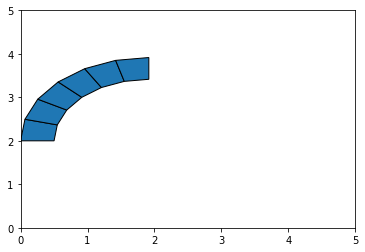

In [10]:
patches = []
# Based on: https://stackoverflow.com/questions/43971259/how-to-draw-polygons-with-python
# and; https://stackoverflow.com/a/68532480/13097194
fig, ax = plt.subplots()
for arch_block in six_block_arch:
    arch_block_polygon = Polygon([arch_block.p1, arch_block.p2, arch_block.p3, arch_block.p4], edgecolor = 'black', closed = 'True')
    ax.add_patch(arch_block_polygon)
plt.xlim(0, 5)
plt.ylim(0, 5)



    # plt.plot(arch_block.p1, arch_block.p2, arch_block.p3, arch_block.p4)